# DEVELOPMENT C3 WEEK 1

Explanataion of the task...

This task has many ways to solve it. First, we have to decide which local descriptor we are will use: SIFT, Dense SIFT, ORB or AKAZE. Each one will be tested first with a standard configuration and see which are the results.

In [1]:
import os
import json
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from main import run_experiment

os.makedirs("results", exist_ok=True)

In [2]:
def load_json(config_path):
    if not os.path.exists(config_path):
        raise FileNotFoundError(f"Please create the file {config_path} first!")

    with open(config_path, "r") as f:
        experiments_list = json.load(f)

    return experiments_list

In [9]:
# Load experiments from JSON
config_path = "configs/local_descriptors.json"

experiments_list = load_json(config_path=config_path)

results_data = []
print(f"Loaded {len(experiments_list)} experiments from {config_path}")

# Run Loop
for exp in experiments_list:
    run_name = exp["name"]
    cfg = exp["config"]
    
    print(f"\n==========================================")
    print(f"Running: {run_name}")
    print(f"==========================================")
    
    start_time = time.time()
    
    # Execute
    train_acc, test_acc = run_experiment(cfg)
    
    duration = time.time() - start_time
    
    results_data.append({
        "Descriptor": run_name,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "Time (s)": duration
    })

# Create DataFrame 
df = pd.DataFrame(results_data)

# Display cleaned table
print("Processed Results:")
display(df)

df.to_csv("results/local_descriptors.csv", index=False)

print("\nAll experiments finished.")

Loaded 3 experiments from configs/local_descriptors.json

Running: SIFT (N=500)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [00:04<00:00, 2101.83it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:04<00:00, 1943.07it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2567 (+/- 0.0111)
Accuracy on Phase [Train]: 0.3025
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:01<00:00, 1836.56it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2795

Running: ORB (N=500)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [00:02<00:00, 3124.69it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:03<00:00, 2263.25it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.1657 (+/- 0.0078)
Accuracy on Phase [Train]: 0.2043
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:01<00:00, 1827.73it/s]


Predicting values...
Accuracy on Phase [Test]: 0.1645

Running: AKAZE (Default)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [00:02<00:00, 3174.99it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:03<00:00, 2260.76it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.1726 (+/- 0.0066)
Accuracy on Phase [Train]: 0.2097
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:00<00:00, 2241.39it/s]


Predicting values...
Accuracy on Phase [Test]: 0.1791
Processed Results:


,Descriptor,Train Accuracy,Test Accuracy,Time (s)
0,SIFT (N=500),0.302529,0.279545,19.687864
1,ORB (N=500),0.204253,0.164545,17.623109
2,AKAZE (Default),0.209655,0.179091,17.741560



All experiments finished.


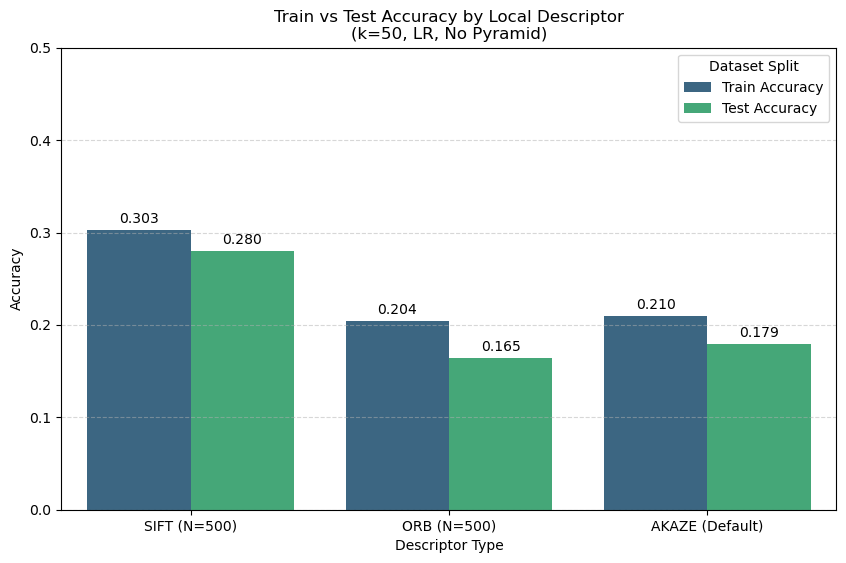

In [10]:
#load data
df = pd.read_csv("results/local_descriptors.csv")

df_melted = df.melt(
    id_vars=["Descriptor"], 
    value_vars=["Train Accuracy", "Test Accuracy"], 
    var_name="Split", 
    value_name="Accuracy"
)

# 4. Plot
plt.figure(figsize=(10, 6))

# Grouped Bar Plot
ax = sns.barplot(
    x="Descriptor", 
    y="Accuracy", 
    hue="Split", 
    data=df_melted, 
    palette="viridis"
)

# Add numeric labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3)

plt.title("Train vs Test Accuracy by Local Descriptor\n(k=50, LR, No Pyramid)")
plt.ylim(0, 0.5) # Adjusted limit since values are around 0.2 - 0.3
plt.ylabel("Accuracy")
plt.xlabel("Descriptor Type")
plt.legend(title="Dataset Split", loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

## Nfeatures of sift

In [9]:
# Load experiments from JSON
config_path = "configs/sift_nfeatures.json"

experiments_list = load_json(config_path=config_path)

results_sift_nfeatures = []
print(f"Loaded {len(experiments_list)} experiments from {config_path}")

for exp in experiments_list:
    run_name = exp["name"]
    cfg = exp["config"]
    
    print(f"\n==========================================")
    print(f"Running: {run_name}")
    print(f"==========================================")
    
    start_time = time.time()
    
    # Execute
    train_acc, test_acc = run_experiment(cfg)
    
    duration = time.time() - start_time
    
    results_sift_nfeatures.append({
        "Descriptor": run_name,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "Time (s)": duration
    })

# Create DataFrame 
df = pd.DataFrame(results_sift_nfeatures)

# Display cleaned table
print("Processed Results:")
display(df)

df.to_csv("results/sift_nfeatures.csv", index=False)

print("\nAll experiments finished.")

Loaded 8 experiments from configs/sift_nfeatures.json

Running: SIFT (N=50)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors not found. Computing...
Processing Train Data...
[train] Computing descriptors... Saving to ./computed_descriptors\SIFT_keypoints_N50\train


Phase [train]: Extracting features: 100%|██████████| 8700/8700 [01:51<00:00, 77.79it/s]


[train] Extraction complete. Descriptors saved to disk.
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [01:05<00:00, 132.26it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:03<00:00, 2868.27it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.1890 (+/- 0.0183)
Accuracy on Phase [Train]: 0.2325
Processing Test Data...
[test] Computing descriptors... Saving to ./computed_descriptors\SIFT_keypoints_N50\test


Phase [test]: Extracting features: 100%|██████████| 2200/2200 [00:28<00:00, 75.89it/s]


[test] Extraction complete. Descriptors saved to disk.
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:16<00:00, 130.95it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2041

Running: SIFT (N=100)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [01:07<00:00, 128.55it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:03<00:00, 2182.79it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2084 (+/- 0.0203)
Accuracy on Phase [Train]: 0.2533
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:18<00:00, 116.59it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2305

Running: SIFT (N=500)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [00:58<00:00, 149.91it/s] 


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:07<00:00, 1176.30it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2567 (+/- 0.0111)
Accuracy on Phase [Train]: 0.3025
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:02<00:00, 834.49it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2795

Running: SIFT (N=1000)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [00:10<00:00, 854.50it/s] 


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:11<00:00, 775.55it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2666 (+/- 0.0197)
Accuracy on Phase [Train]: 0.3128
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:03<00:00, 589.51it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2968

Running: SIFT (N=1500)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [00:09<00:00, 872.15it/s] 


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:11<00:00, 759.40it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2700 (+/- 0.0131)
Accuracy on Phase [Train]: 0.3190
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:03<00:00, 616.31it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2882

Running: SIFT (N=3000)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [00:09<00:00, 901.46it/s] 


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:11<00:00, 758.37it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2700 (+/- 0.0173)
Accuracy on Phase [Train]: 0.3109
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:03<00:00, 631.69it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2909

Running: SIFT (N=5000)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [01:11<00:00, 121.61it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:11<00:00, 745.54it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2700 (+/- 0.0173)
Accuracy on Phase [Train]: 0.3109
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:23<00:00, 93.46it/s] 


Predicting values...
Accuracy on Phase [Test]: 0.2909

Running: SIFT (N=10000)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [01:24<00:00, 103.12it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:12<00:00, 723.79it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2700 (+/- 0.0173)
Accuracy on Phase [Train]: 0.3109
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:24<00:00, 89.78it/s] 


Predicting values...
Accuracy on Phase [Test]: 0.2909
Processed Results:


,Descriptor,Train Accuracy,Test Accuracy,Time (s)
0,SIFT (N=50),0.232529,0.204091,241.469252
1,SIFT (N=100),0.253333,0.230455,103.099622
2,SIFT (N=500),0.302529,0.279545,80.270917
3,SIFT (N=1000),0.312759,0.296818,37.375105
4,SIFT (N=1500),0.318966,0.288182,37.359983
5,SIFT (N=3000),0.310920,0.290909,36.953145
6,SIFT (N=5000),0.310920,0.290909,119.159583
7,SIFT (N=10000),0.310920,0.290909,133.874259



All experiments finished.


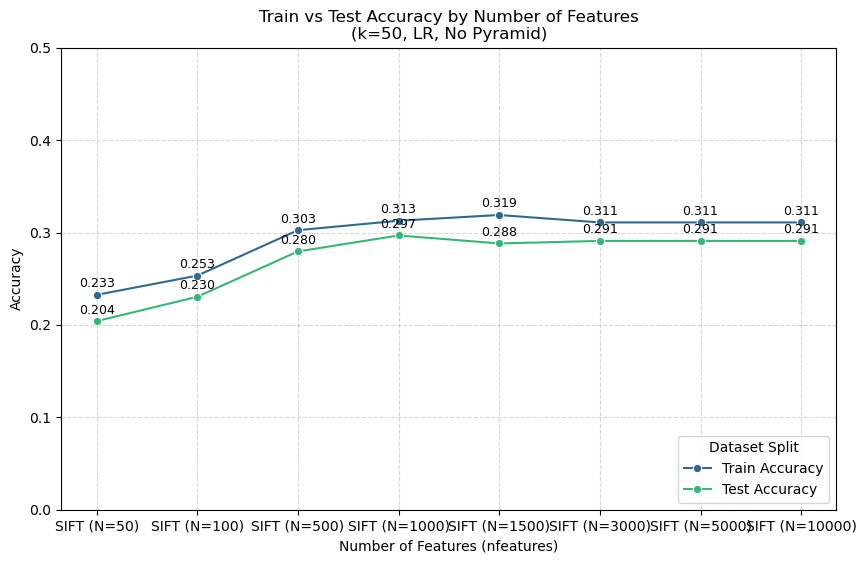

In [ ]:
# load data
df = pd.read_csv("results/sift_nfeatures.csv")

df_melted = df.melt(
    id_vars=["Descriptor"], 
    value_vars=["Train Accuracy", "Test Accuracy"], 
    var_name="Split", 
    value_name="Accuracy"
)

plt.figure(figsize=(10, 6))

# Line Plot
ax = sns.lineplot(
    x="Descriptor", 
    y="Accuracy", 
    hue="Split", 
    data=df_melted, 
    palette="viridis",
    marker="o" 
)

# Labeling values on a line chart (Optional)
# This loop adds the text label next to each point
for x, y, val in zip(df_melted["Descriptor"], df_melted["Accuracy"], df_melted["Accuracy"]):
    plt.text(x, y + 0.005, f'{val:.3f}', ha='center', va='bottom', fontsize=9)

plt.title("Train vs Test Accuracy by Number of Features\n(k=50, LR, No Pyramid)")
plt.ylim(0, 0.5) # Keep your limits or adjust as needed
plt.ylabel("Accuracy")
plt.xlabel("Number of Features (nfeatures)")
plt.legend(title="Dataset Split", loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

# Dense SIFT

In [ ]:
# --- GRID SEARCH PARAMETERS ---
step_sizes = [4, 8, 16, 32]   # X-axis: Density (smaller = denser)
scale_factors = [1, 2, 4]     # Y-axis: Relative Size (Scale = Step * Factor)

# Common base configuration
BASE_CONFIG = {
    "data_path": "../data/MIT_split/",
    "seed": 42,
    
    "detector": "SIFT",
    "dense": True,          # Enable Dense SIFT
    "detector_kwargs": {},
    
    "codebook_size": 50,    # Keep k low for speed
    "spatial_pyramid": False,
    "levels": [1],
    
    "classifier": "LogisticRegression",
    "C": 1.0,
    "gamma": "scale",

    "codebook_batch_size": 1000,

    "max_samples_train": None,
    "max_samples_test": None
}

# --- EXPERIMENT GENERATOR ---
experiments_list = []

for step in step_sizes:
    for factor in scale_factors:
        # Calculate actual scale in pixels
        scale_pixels = int(step / factor)
        
        # Copy base config
        cfg = BASE_CONFIG.copy()
        
        # Inject variable parameters
        cfg["step_size"] = step
        cfg["scale"] = scale_pixels
        
        # Save metadata for plotting later
        exp_name = f"Dense (Step={step}, Scale={scale_pixels})"
        
        experiments_list.append({
            "name": exp_name,
            "config": cfg,
            "meta_step": step,
            "meta_factor": f"{factor}x Step" # Pretty label for legend
        })

print(f"Generated {len(experiments_list)} experiments in memory.")

results_data = []

print(f"Starting Dense SIFT Grid Search...")

for i, exp in enumerate(experiments_list):
    run_name = exp["name"]
    cfg = exp["config"]
    
    print(f"\n[{i+1}/{len(experiments_list)}] Running: {run_name} ...")
    start_time = time.time()
    
    # Execute pipeline
    # main.py returns (train_acc, test_acc)
    train_acc, test_acc = run_experiment(cfg)
    
    duration = time.time() - start_time
    
    # Store results + metadata for plotting
    results_data.append({
        "Step Size": exp["meta_step"],
        "Scale Factor": exp["meta_factor"],
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "Time (s)": duration
    })

print("\nGrid Search completed!")

Generated 12 experiments in memory.
Starting Dense SIFT Grid Search...

[1/12] Running: Dense (Step=4, Scale=4) ...
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors not found. Computing...
Processing Train Data...
[train] Computing descriptors... Saving to ./computed_descriptors\SIFT_dense_step4_size4\train


Phase [train]: Extracting features:  88%|████████▊ | 7671/8700 [08:03<00:59, 17.21it/s]

## Codebook size k

In [5]:
# Load experiments from JSON
config_path = "configs/codebook_size.json"

experiments_list = load_json(config_path=config_path)

results_codebook_size = []
print(f"Loaded {len(experiments_list)} experiments from {config_path}")

for exp in experiments_list:
    run_name = exp["name"]
    cfg = exp["config"]
    
    print(f"\n==========================================")
    print(f"Running: {run_name}")
    print(f"==========================================")
    
    start_time = time.time()
    
    # Execute
    train_acc, test_acc = run_experiment(cfg)
    
    duration = time.time() - start_time
    
    results_codebook_size.append({
        "Descriptor": run_name,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "Time (s)": duration
    })

# Create DataFrame 
df = pd.DataFrame(results_codebook_size)

# Display cleaned table
print("Processed Results:")
display(df)

df.to_csv("results/codebook_size.csv", index=False)

print("\nAll experiments finished.")

Loaded 7 experiments from configs/codebook_size.json

Running: SIFT (k=10)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors not found. Computing...
Processing Train Data...
[train] Computing descriptors... Saving to ./computed_descriptors\SIFT_keypoints_N1000\train


Phase [train]: Extracting features: 100%|██████████| 8700/8700 [02:59<00:00, 48.56it/s]


[train] Extraction complete. Descriptors saved to disk.
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [03:14<00:00, 44.80it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:21<00:00, 401.59it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.1930 (+/- 0.0123)
Accuracy on Phase [Train]: 0.2192
Processing Test Data...
[test] Computing descriptors... Saving to ./computed_descriptors\SIFT_keypoints_N1000\test


Phase [test]: Extracting features: 100%|██████████| 2200/2200 [00:53<00:00, 40.90it/s]


[test] Extraction complete. Descriptors saved to disk.
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:36<00:00, 60.39it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2168

Running: SIFT (k=50)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:20<00:00, 430.22it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:14<00:00, 617.57it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2645 (+/- 0.0200)
Accuracy on Phase [Train]: 0.3155
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:06<00:00, 331.83it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3000

Running: SIFT (k=100)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:22<00:00, 379.10it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:16<00:00, 539.86it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2785 (+/- 0.0124)
Accuracy on Phase [Train]: 0.3480
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:06<00:00, 336.90it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3123

Running: SIFT (k=200)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:21<00:00, 395.57it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:16<00:00, 542.17it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2847 (+/- 0.0214)
Accuracy on Phase [Train]: 0.3811
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:06<00:00, 337.90it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3332

Running: SIFT (k=500)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:28<00:00, 310.71it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:33<00:00, 259.20it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.3000 (+/- 0.0199)
Accuracy on Phase [Train]: 0.4431
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:09<00:00, 244.22it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3345

Running: SIFT (k=1000)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:35<00:00, 246.69it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:42<00:00, 204.09it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.3021 (+/- 0.0190)
Accuracy on Phase [Train]: 0.5084
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:09<00:00, 223.68it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3268

Running: SIFT (k=2000)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:58<00:00, 147.62it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [01:04<00:00, 135.28it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.3038 (+/- 0.0169)
Accuracy on Phase [Train]: 0.5806
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:47<00:00, 45.95it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3336
Processed Results:


,Descriptor,Train Accuracy,Test Accuracy,Time (s)
0,SIFT (k=10),0.219195,0.216818,501.130393
1,SIFT (k=50),0.315517,0.300000,61.047951
2,SIFT (k=100),0.348046,0.312273,64.586207
3,SIFT (k=200),0.381149,0.333182,60.642011
4,SIFT (k=500),0.443103,0.334545,89.971103
5,SIFT (k=1000),0.508391,0.326818,110.060802
6,SIFT (k=2000),0.580575,0.333636,196.990648



All experiments finished.


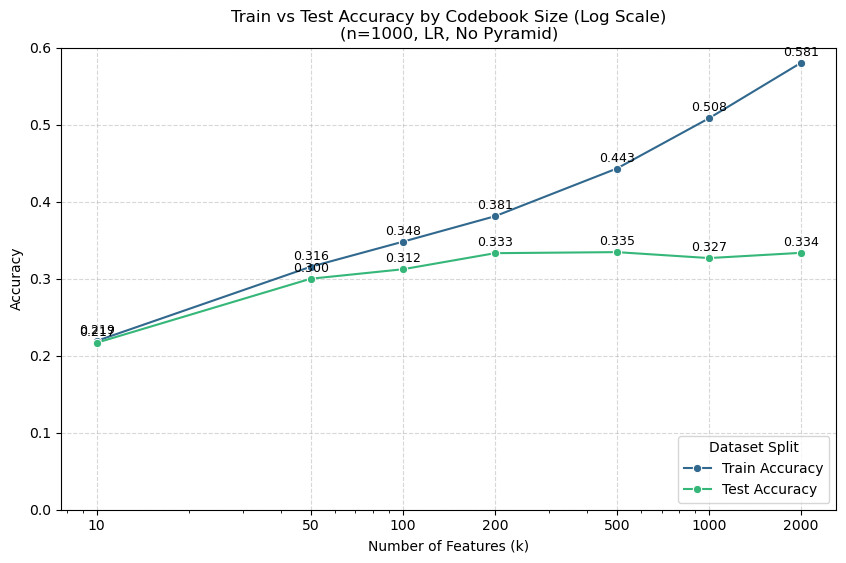

In [ ]:
from matplotlib.ticker import ScalarFormatter # Import this for clean numbers

# 1. Load data
df = pd.read_csv("results/codebook_size.csv")

# 2. Extract integers
df['Codebook_Size'] = df['Descriptor'].str.extract(r'(\d+)').astype(int)

# 3. Melt
df_melted = df.melt(
    id_vars=["Codebook_Size"], 
    value_vars=["Train Accuracy", "Test Accuracy"], 
    var_name="Split", 
    value_name="Accuracy"
)

# Sort
df_melted = df_melted.sort_values(by="Codebook_Size")

plt.figure(figsize=(10, 6))

# 4. Line Plot
ax = sns.lineplot(
    x="Codebook_Size", 
    y="Accuracy", 
    hue="Split", 
    data=df_melted, 
    palette="viridis", 
    marker="o" 
)

# --- KEY CHANGE: LOG SCALE ---
ax.set_xscale('log')

# --- KEY CHANGE: FIX TICKS ---
# This forces matplotlib to label every single x value in your dataset (10, 50, 100, etc.)
# otherwise, it might skip 50 and 200 because they aren't powers of 10.
ax.set_xticks(df['Codebook_Size'].unique())
ax.get_xaxis().set_major_formatter(ScalarFormatter()) # Removes scientific notation (10^2)

# 5. Add Text Labels
for x, y, val in zip(df_melted["Codebook_Size"], df_melted["Accuracy"], df_melted["Accuracy"]):
    ax.text(x, y + 0.005, f'{val:.3f}', ha='center', va='bottom', fontsize=9)

plt.title("Train vs Test Accuracy by Codebook Size (Log Scale)\n(n=1000, LR, No Pyramid)")
plt.ylim(0, 0.6) 
plt.ylabel("Accuracy")
plt.xlabel("Codebook Size (k)")
plt.legend(title="Dataset Split", loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

# Dimensionality Reduction

In [ ]:
# Load experiments from JSON
config_path = "configs/dim_reduction.json"

experiments_list = load_json(config_path=config_path)

results_dim_reduction = []
print(f"Loaded {len(experiments_list)} experiments from {config_path}")

for exp in experiments_list:
    run_name = exp["name"]
    cfg = exp["config"]
    
    print(f"\n==========================================")
    print(f"Running: {run_name}")
    print(f"==========================================")
    
    start_time = time.time()
    
    # Execute
    train_acc, test_acc = run_experiment(cfg)
    
    duration = time.time() - start_time
    
    results_dim_reduction.append({
        "Descriptor": run_name,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "Time (s)": duration
    })

# Create DataFrame 
df = pd.DataFrame(results_dim_reduction)

# Display cleaned table
print("Processed Results:")
display(df)

df.to_csv("results/dim_reduction.csv", index=False)

print("\nAll experiments finished.")

In [4]:
# Create DataFrame 
df = pd.DataFrame(results_dim_reduction)

# Display cleaned table
print("Processed Results:")
display(df)

df.to_csv("results/dim_reduction.csv", index=False)

print("\nAll experiments finished.")

Processed Results:


,Descriptor,Train Accuracy,Test Accuracy,Time (s)
0,SIFT (pca_components=1),0.260115,0.185455,94.956573
1,SIFT (pca_components=8),0.366437,0.319545,105.611050
2,SIFT (pca_components=16),0.377471,0.312727,140.424786
3,SIFT (pca_components=32),0.385862,0.313636,117.474683
4,SIFT (pca_components=64),0.387471,0.329091,150.394045
5,SIFT (pca_components=128),0.382069,0.330455,146.015256



All experiments finished.


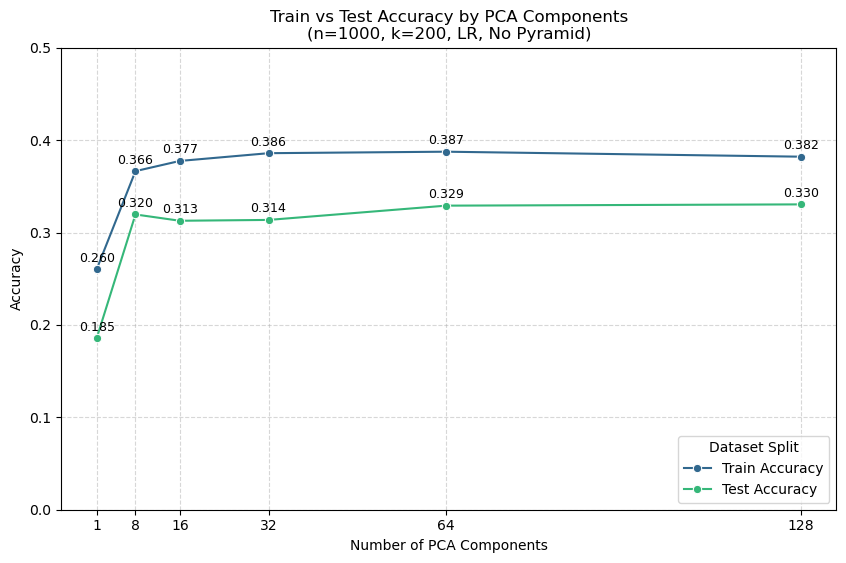

In [ ]:
# 1. Load data
df = pd.read_csv("results/dim_reduction.csv")

# 2. Extract the integer from the text string
# This looks for digits (\d+) inside the string and converts them to integers
df['PCA_Components'] = df['Descriptor'].str.extract(r'(\d+)').astype(int)

# 3. Melt the dataframe (Use the new PCA_Components column as an ID var)
df_melted = df.melt(
    id_vars=["PCA_Components"], # Changed from Descriptor to the new clean column
    value_vars=["Train Accuracy", "Test Accuracy"], 
    var_name="Split", 
    value_name="Accuracy"
)

# Sort values to ensure the line plot connects points in order
df_melted = df_melted.sort_values(by="PCA_Components")

plt.figure(figsize=(10, 6))

# 4. Line Plot
ax = sns.lineplot(
    x="PCA_Components", 
    y="Accuracy", 
    hue="Split", 
    data=df_melted, 
    palette="viridis", # You can also use ["#3b759e", "#3bc08a"] to match the image exactly
    marker="o" 
)

# 5. Add Text Labels
# Iterate over the melted data to place text
for x, y, val in zip(df_melted["PCA_Components"], df_melted["Accuracy"], df_melted["Accuracy"]):
    ax.text(x, y + 0.005, f'{val:.3f}', ha='center', va='bottom', fontsize=9)

# 6. Formatting
plt.title("Train vs Test Accuracy by PCA Components\n(n=1000, k=200, LR, No Pyramid)")
plt.ylim(0, 0.5)
plt.ylabel("Accuracy")
plt.xlabel("Number of PCA Components")
plt.legend(title="Dataset Split", loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)

# Force the x-axis to show exactly the numbers present in your data
ax.set_xticks(df['PCA_Components'].unique())

plt.show()

## Normalization and Scaling

In [3]:
# Load experiments from JSON
config_path = "configs/norm_scale.json"

experiments_list = load_json(config_path=config_path)

results_norm_scale = []
print(f"Loaded {len(experiments_list)} experiments from {config_path}")

for exp in experiments_list:
    run_name = exp["name"]
    cfg = exp["config"]
    
    print(f"\n==========================================")
    print(f"Running: {run_name}")
    print(f"==========================================")
    
    start_time = time.time()
    
    # Execute
    train_acc, test_acc = run_experiment(cfg)
    
    duration = time.time() - start_time
    
    results_norm_scale.append({
        "Descriptor": run_name,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "Time (s)": duration
    })

# Create DataFrame 
df = pd.DataFrame(results_norm_scale)

# Display cleaned table
print("Processed Results:")
display(df)

df.to_csv("results/norm_scale.csv", index=False)

print("\nAll experiments finished.")

Loaded 9 experiments from configs/norm_scale.json

Running: SIFT_None_None
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
[DEBUG BOVW] Initialized with normalization='none'
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:14<00:00, 618.70it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:11<00:00, 725.96it/s]


Fitting the classifier: LogisticRegression...
[DEBUG] Config scaler: 'None' (Type: <class 'NoneType'>)
[DEBUG] Resolved scaler object: None
Performing Cross-Validation...
CV Accuracy: 0.2702 (+/- 0.0143)
Accuracy on Phase [Train]: 0.4070
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:03<00:00, 581.65it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3073

Running: SIFT_L2_None
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
[DEBUG BOVW] Initialized with normalization='l2'
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:11<00:00, 731.63it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:12<00:00, 718.35it/s]


Fitting the classifier: LogisticRegression...
[DEBUG] Config scaler: 'None' (Type: <class 'NoneType'>)
[DEBUG] Resolved scaler object: None
Performing Cross-Validation...
CV Accuracy: 0.2847 (+/- 0.0214)
Accuracy on Phase [Train]: 0.3811
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:03<00:00, 709.49it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3332

Running: SIFT_L1_None
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
[DEBUG BOVW] Initialized with normalization='l1'
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:12<00:00, 723.58it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:13<00:00, 656.10it/s]


Fitting the classifier: LogisticRegression...
[DEBUG] Config scaler: 'None' (Type: <class 'NoneType'>)
[DEBUG] Resolved scaler object: None
Performing Cross-Validation...
CV Accuracy: 0.2351 (+/- 0.0180)
Accuracy on Phase [Train]: 0.2617
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:03<00:00, 669.46it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2445

Running: SIFT_L2_Standard
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
[DEBUG BOVW] Initialized with normalization='l2'
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:12<00:00, 706.77it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:12<00:00, 698.61it/s]


Fitting the classifier: LogisticRegression...
[DEBUG] Config scaler: 'StandardScaler' (Type: <class 'str'>)
[DEBUG] Resolved scaler object: StandardScaler()
Fitting Scaler: StandardScaler...
[DEBUG] Histograms mean after scaling: -0.0000, std: 1.0000
Performing Cross-Validation...
CV Accuracy: 0.2691 (+/- 0.0185)
Accuracy on Phase [Train]: 0.4025
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:03<00:00, 600.00it/s]


Applying Scaler transform...
Predicting values...
Accuracy on Phase [Test]: 0.3059

Running: SIFT_L1_Standard
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
[DEBUG BOVW] Initialized with normalization='l1'
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:13<00:00, 644.03it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:15<00:00, 553.54it/s]


Fitting the classifier: LogisticRegression...
[DEBUG] Config scaler: 'StandardScaler' (Type: <class 'str'>)
[DEBUG] Resolved scaler object: StandardScaler()
Fitting Scaler: StandardScaler...
[DEBUG] Histograms mean after scaling: -0.0000, std: 1.0000
Performing Cross-Validation...
CV Accuracy: 0.2644 (+/- 0.0184)
Accuracy on Phase [Train]: 0.3899
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:03<00:00, 600.72it/s]


Applying Scaler transform...
Predicting values...
Accuracy on Phase [Test]: 0.3005

Running: SIFT_None_Standard
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
[DEBUG BOVW] Initialized with normalization='none'
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:13<00:00, 655.94it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:13<00:00, 655.64it/s]


Fitting the classifier: LogisticRegression...
[DEBUG] Config scaler: 'StandardScaler' (Type: <class 'str'>)
[DEBUG] Resolved scaler object: StandardScaler()
Fitting Scaler: StandardScaler...
[DEBUG] Histograms mean after scaling: -0.0000, std: 1.0000
Performing Cross-Validation...
CV Accuracy: 0.2705 (+/- 0.0144)
Accuracy on Phase [Train]: 0.4062
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:03<00:00, 674.73it/s]


Applying Scaler transform...
Predicting values...
Accuracy on Phase [Test]: 0.3086

Running: SIFT_L2_MinMax
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
[DEBUG BOVW] Initialized with normalization='l2'
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:12<00:00, 723.13it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:13<00:00, 631.94it/s]


Fitting the classifier: LogisticRegression...
[DEBUG] Config scaler: 'MinMaxScaler' (Type: <class 'str'>)
[DEBUG] Resolved scaler object: MinMaxScaler()
Fitting Scaler: MinMaxScaler...
[DEBUG] Histograms mean after scaling: 0.1184, std: 0.1171
Performing Cross-Validation...
CV Accuracy: 0.2779 (+/- 0.0208)
Accuracy on Phase [Train]: 0.3987
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:03<00:00, 615.90it/s]


Applying Scaler transform...
Predicting values...
Accuracy on Phase [Test]: 0.3118

Running: SIFT_L1_MinMax
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
[DEBUG BOVW] Initialized with normalization='l1'
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:12<00:00, 717.88it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:13<00:00, 632.99it/s]


Fitting the classifier: LogisticRegression...
[DEBUG] Config scaler: 'MinMaxScaler' (Type: <class 'str'>)
[DEBUG] Resolved scaler object: MinMaxScaler()
Fitting Scaler: MinMaxScaler...
[DEBUG] Histograms mean after scaling: 0.0606, std: 0.0712
Performing Cross-Validation...
CV Accuracy: 0.2723 (+/- 0.0207)
Accuracy on Phase [Train]: 0.3718
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:03<00:00, 642.79it/s]


Applying Scaler transform...
Predicting values...
Accuracy on Phase [Test]: 0.2973

Running: SIFT_None_MinMax
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
[DEBUG BOVW] Initialized with normalization='none'
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:12<00:00, 692.78it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:14<00:00, 615.22it/s]


Fitting the classifier: LogisticRegression...
[DEBUG] Config scaler: 'MinMaxScaler' (Type: <class 'str'>)
[DEBUG] Resolved scaler object: MinMaxScaler()
Fitting Scaler: MinMaxScaler...
[DEBUG] Histograms mean after scaling: 0.0974, std: 0.1098
Performing Cross-Validation...
CV Accuracy: 0.2777 (+/- 0.0178)
Accuracy on Phase [Train]: 0.3949
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:03<00:00, 606.96it/s]


Applying Scaler transform...
Predicting values...
Accuracy on Phase [Test]: 0.3177
Processed Results:


,Descriptor,Train Accuracy,Test Accuracy,Time (s)
0,SIFT_None_None,0.407011,0.307273,53.820507
1,SIFT_L2_None,0.381149,0.333182,36.879035
2,SIFT_L1_None,0.261724,0.244545,37.130173
3,SIFT_L2_Standard,0.402529,0.305909,38.966201
4,SIFT_L1_Standard,0.389885,0.300455,42.837936
5,SIFT_None_Standard,0.406207,0.308636,41.353422
6,SIFT_L2_MinMax,0.398736,0.311818,40.130573
7,SIFT_L1_MinMax,0.371839,0.297273,40.026838
8,SIFT_None_MinMax,0.394943,0.317727,41.665117



All experiments finished.


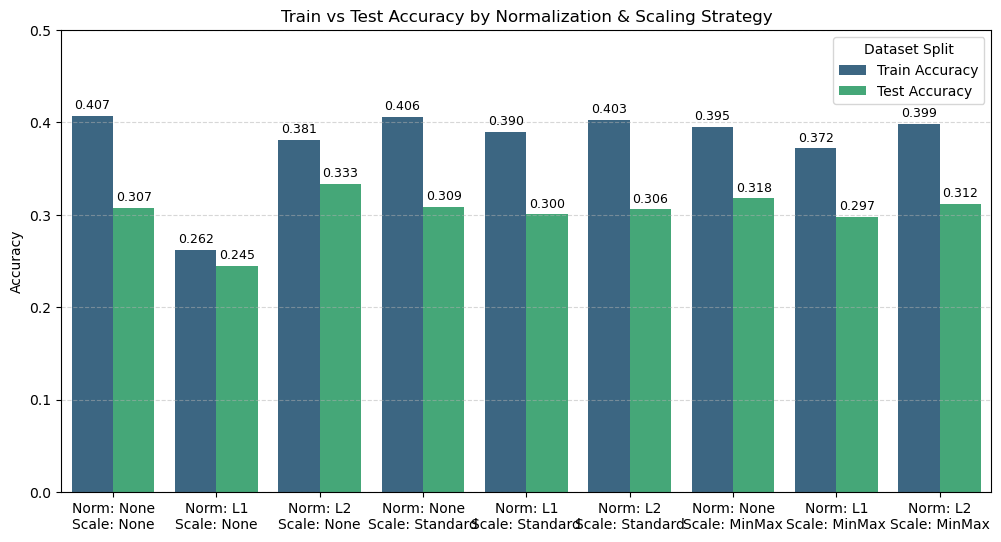

In [4]:
# Load results
results = pd.read_csv("results/norm_scale.csv")


# 2. Extract Norm and Scale for cleaner labeling and sorting
df[['Prefix', 'Norm', 'Scale']] = df['Descriptor'].str.split('_', expand=True)

# 3. Sort the data systematically
# This ensures the bars are grouped logically (e.g., all "Scale: None" together)
norm_order = ['None', 'L1', 'L2']
scale_order = ['None', 'Standard', 'MinMax']

df['Norm'] = pd.Categorical(df['Norm'], categories=norm_order, ordered=True)
df['Scale'] = pd.Categorical(df['Scale'], categories=scale_order, ordered=True)
df = df.sort_values(by=['Scale', 'Norm'])

# Create a clean label for the X-axis
df['Label'] = "Norm: " + df['Norm'].astype(str) + "\nScale: " + df['Scale'].astype(str)

# 4. Melt for Seaborn
df_melted = df.melt(
    id_vars=['Label'], 
    value_vars=['Train Accuracy', 'Test Accuracy'], 
    var_name='Split', 
    value_name='Accuracy'
)

plt.figure(figsize=(12, 6))

# 5. Bar Plot
ax = sns.barplot(
    x='Label', 
    y='Accuracy', 
    hue='Split', 
    data=df_melted, 
    palette='viridis'
)

# 6. Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=9)

plt.title("Train vs Test Accuracy by Normalization & Scaling Strategy")
plt.ylim(0, 0.5) # Adjust based on your max value
plt.ylabel("Accuracy")
plt.xlabel("") # Label is self-explanatory
plt.legend(title="Dataset Split", loc='upper right')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0) # Keep labels horizontal if they fit, or 45 if they don't

plt.show()